# Practical 2: Keras with MNIST Dataset

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(f"{X_train.shape=}\n{y_train.shape=}\n{X_test.shape=}\n{y_test.shape=}")

X_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


## Processing and Visualizing the Data

In [4]:
X_train = X_train / 255.
X_test  = X_test  / 255.
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = encoder.transform(y_test.reshape(-1, 1)).toarray()

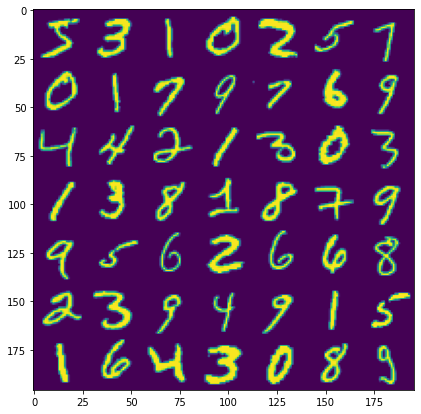

In [5]:
fig, ax = plt.subplots(figsize=(7, 7))
X_to_plot = X_train[:49, :]
X_to_plot = np.c_[X_to_plot[  : 7, ...].reshape(28*7, 28),
                  X_to_plot[ 7:14, ...].reshape(28*7, 28),
                  X_to_plot[14:21, ...].reshape(28*7, 28),
                  X_to_plot[21:28, ...].reshape(28*7, 28),
                  X_to_plot[28:35, ...].reshape(28*7, 28),
                  X_to_plot[35:42, ...].reshape(28*7, 28),
                  X_to_plot[42:49, ...].reshape(28*7, 28)]
ax.imshow(X_to_plot)

## Creating the Keras Model

In [6]:
model = Sequential()

In [7]:
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training the Model

In [9]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7522 - accuracy: 0.7738 - val_loss: 0.2441 - val_accuracy: 0.9289
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2389 - accuracy: 0.9316 - val_loss: 0.2199 - val_accuracy: 0.9362
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.1954 - val_accuracy: 0.9453
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1765 - accuracy: 0.9481 - val_loss: 0.1884 - val_accuracy: 0.9465
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1642 - accuracy: 0.9519 - val_loss: 0.1767 - val_accuracy: 0.9477


## Evaluating on the Test Set

In [10]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9477


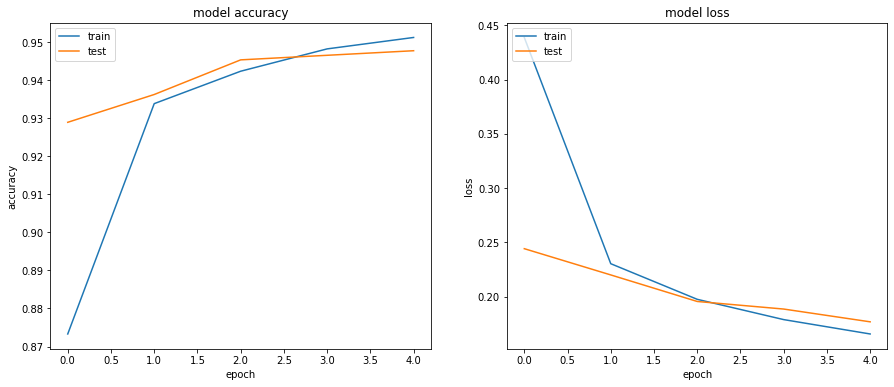

In [11]:
# summarize history for accuracy
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(history.history['accuracy']);
ax[0].plot(history.history['val_accuracy']);
ax[0].set_title('model accuracy');
ax[0].set_ylabel('accuracy');
ax[0].set_xlabel('epoch');
ax[0].legend(['train', 'test'], loc='upper left');
# summarize history for loss
ax[1].plot(history.history['loss']);
ax[1].plot(history.history['val_loss']);
ax[1].set_title('model loss');
ax[1].set_ylabel('loss');
ax[1].set_xlabel('epoch');
ax[1].legend(['train', 'test'], loc='upper left');